#Membaca File JSON

In [ ]:
import json
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/STKI-Project/Minggu2/1525136940000.detik-news.6420e5bc70.json"

# Baca JSON
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Ambil isi teks dari key
if "content" in data:
    kalimat = data["content"]
elif "text" in data:
    kalimat = data["text"]
else:
    kalimat = str(data)

print("Output Kalimat Asli: ")
print(kalimat[:500], "...")

Mounted at /content/drive
Output Kalimat Asli: 
Jakarta -
Wakil Gubernur DKI Jakarta Sandiaga Uno mengatakan relawan atau timses pada masa Pilkada 2017 diperbolehkan mendaftar seleksi direksi BUMD. Syaratnya, kata Sandi, harus profesional. "Boleh saja selama dia profesional. Tapi, begitu dia masuk, kan selama dia tidak berafiliasi dengan partai politik, dia bebas saja," kata Sandi di Balai Kota, Jakarta Pusat, Senin (30/4/2018). "Relawan timses banyak sekali. Relawan timses yang menyebut dirinya relawan. Karena kemarin 3,2 juta yang memilih A ...


#Cleaning

In [3]:
import re
import string

lower_case = kalimat.lower()
remove_number = re.sub(r"\d+", "", lower_case)
remove_punctuatuion = remove_number.translate(str.maketrans("", "", string.punctuation))
clean_word = re.sub(r'\s+', ' ', remove_punctuatuion).strip()

print(clean_word[:500], "...")

jakarta wakil gubernur dki jakarta sandiaga uno mengatakan relawan atau timses pada masa pilkada diperbolehkan mendaftar seleksi direksi bumd syaratnya kata sandi harus profesional boleh saja selama dia profesional tapi begitu dia masuk kan selama dia tidak berafiliasi dengan partai politik dia bebas saja kata sandi di balai kota jakarta pusat senin relawan timses banyak sekali relawan timses yang menyebut dirinya relawan karena kemarin juta yang memilih aniessandi dan kalau misalnya ada satu re ...


#Tokenisasi

In [4]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

tokens = nltk.tokenize.word_tokenize(clean_word)
print(tokens[:15], "...")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['jakarta', 'wakil', 'gubernur', 'dki', 'jakarta', 'sandiaga', 'uno', 'mengatakan', 'relawan', 'atau', 'timses', 'pada', 'masa', 'pilkada', 'diperbolehkan'] ...


#Filtering Stopwords

In [13]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
import string # Import string module

factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover() # Renamed variable from stopword to stopword_remover

text_filtered = stopword_remover.remove(clean_word) # Use the renamed variable
filtered_tokens = nltk.tokenize.word_tokenize(text_filtered)

print("Token (30 pertama):", tokens[:30])

Token (30 pertama): ['jakarta', 'wakil', 'gubernur', 'dki', 'jakarta', 'sandiaga', 'uno', 'mengatakan', 'relawan', 'timses', 'masa', 'pilkada', 'diperbolehkan', 'mendaftar', 'seleksi', 'direksi', 'bumd', 'syaratnya', 'kata', 'sandi', 'profesional', 'selama', 'profesional', 'begitu', 'masuk', 'kan', 'selama', 'tidak', 'berafiliasi', 'partai']


#Stemming

In [9]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
stemmed_tokens = [stemmer.stem(w) for w in tokens]

print("Hasil stemming:", stemmed_tokens[:20], "\n")


Hasil stemming: ['jakarta', 'wakil', 'gubernur', 'dki', 'jakarta', 'sandiaga', 'uno', 'kata', 'rawan', 'timses', 'masa', 'pilkada', 'boleh', 'daftar', 'seleksi', 'direksi', 'bumd', 'syarat', 'kata', 'sandi'] 



#Named Entity Recognition: spaCy

In [12]:
import spacy

nlp = spacy.load("xx_ent_wiki_sm")
doc = nlp(kalimat)
entities = [(ent.text, ent.label_) for ent in doc.ents]

print("Entity Terdeteksi:")
for ent, label in entities:
    print(f" - {ent} ({label})")

Entity Terdeteksi:
 - Jakarta -
Wakil Gubernur (LOC)
 - Jakarta Sandiaga (PER)
 - Pilkada 2017 (MISC)
 - BUMD (MISC)
 - Syaratnya (MISC)
 - Sandi (MISC)
 - Boleh (PER)
 - Sandi di Balai Kota (PER)
 - Jakarta Pusat (PER)
 - Senin (LOC)
 - Karena (PER)
 - Anies-Sandi (MISC)
 - itu (ORG)
 - yang baik (PER)
 - Sandi (MISC)
 - Sandi (PER)
 - BUMD (MISC)
 - Asalkan (PER)
 - BUMD (MISC)
 - Pergub (LOC)
 - DKI 5 Tahun 2018 (MISC)
 - calon orang perseorangan (PER)
 - BUMD (MISC)
 - jika ada relawan yang mendaftar seleksi (PER)
 - Sebab (ORG)
 - Sandiaga (PER)
 - BUMD (MISC)
 - Kita (PER)
 - BUMD (MISC)
 - Kita (PER)
 - UKK-nya (ORG)
 - bahwa ini (PER)
 - komisaris (LOC)
 - yang akan (PER)
 - idn/rvk (MISC)


#Simpan Hasil ke CSV

In [16]:
import pandas as pd
import os

df = pd.DataFrame({
    "Tahap": ["Dokumen Asli", "Cleaning", "Tokenisasi", "Filtering", "Stemming"],
    "Hasil": [
        kalimat[:300] + "...",
        clean_word[:300] + "...",
        " ".join(tokens[:20]) + "...",
        " ".join(filtered_tokens[:20]) + "...",
        " ".join(stemmed_tokens[:20]) + "..."
    ]
})

output_path = os.path.join('/content/drive/MyDrive/STKI-Project/Minggu2/', "hasil_preprocessing_detiknews.csv")
df.to_csv(output_path, index=False, encoding="utf-8")

print(f"File hasil disimpan di: {output_path}\n")

File hasil disimpan di: /content/drive/MyDrive/STKI-Project/Minggu2/hasil_preprocessing_detiknews.csv



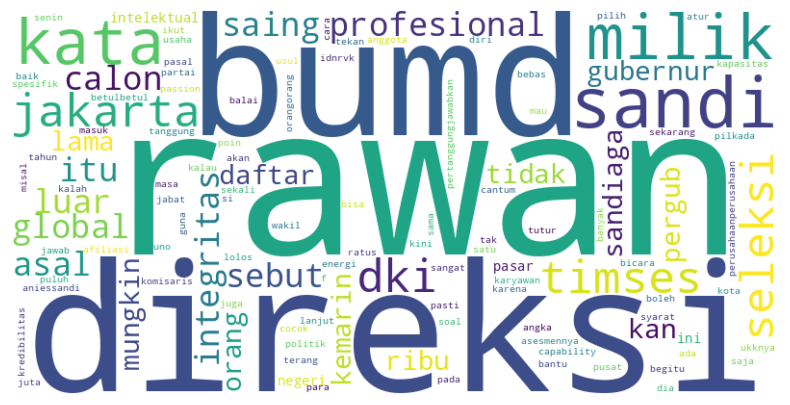

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

teks_wordcloud = ' '.join(stemmed_tokens)

# buat objek WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    collocations=False  # supaya kata-kata tidak digabung jadi frasa
).generate(teks_wordcloud)

# tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()